# Data Processing and Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [44]:
data = pd.read_csv('/Users/yangxi/Desktop/ECS260/project/Filtered_Final_Project_List.csv')
data = data.drop(columns='Unnamed: 0')
data['Project Status'].replace(2,0,inplace=True)
data.head()

,Project Full Name,Project Status,Project Startdate,Project Enddate,PR Number,Merged PR Number,First PR Created Time,Merge Frequency,Comments Number,Commits number,...,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,merged_average_additions,merged_average_deletions,merged_average_pr_changed_files,merged_average_pr_commits_count,merged_average_total_comments
0,apache/Airflow,1,3/31/16,12/19/18,14061,9941,4/20/15 21:52,426,81972,14056,...,299.093530,139.467650,6.743547,3.242709,7.135434,118.052030,113.491117,4.318528,1.511421,9.596447
1,apache/Ambari,1,8/30/11,11/20/13,3235,2913,5/16/13 9:53,120,11378,24588,...,8932.333333,133.333333,81.000000,9.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
2,apache/apex-core,1,8/17/15,4/20/16,604,470,8/25/15 23:43,67,5333,6122,...,237.365385,64.375000,7.227564,3.862179,5.275641,153.045267,63.641975,6.670782,1.855967,4.716049
3,apache/APISIX,1,10/17/19,7/15/20,2786,2404,5/5/19 8:14,310,21215,2578,...,196.054636,25.753311,5.375828,3.415563,3.942053,98.253465,18.641584,4.299010,3.095050,2.649505
4,apache/AsterixDB,1,2/28/15,4/20/16,11,0,1/14/16 1:21,1,9,8582,...,7430.000000,2207.000000,221.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
data_model1 = data.iloc[:,:14]
data_model1['First PR Created Time'] = data_model1['Merged PR Number']/data_model1['PR Number']
data_model1 = data_model1.rename({'First PR Created Time':'Merge Ratio'}, axis='columns')
data_model1 = data_model1.drop(columns='Merged PR Number')
data_model1 = data_model1.drop(columns='Project Full Name')
data_model1 = data_model1.drop(columns='Project Startdate')
data_model1 = data_model1.drop(columns='Project Enddate')
data_model1.head()

,Project Status,PR Number,Merge Ratio,Merge Frequency,Comments Number,Commits number,Stars,Forks,size,contributor
0,1,14061,0.706991,426,81972,14056,23673,9559,137059,416
1,1,3235,0.900464,120,11378,24588,1561,1340,365411,129
2,1,604,0.778146,67,5333,6122,347,180,14807,41
3,1,2786,0.862886,310,21215,2578,7372,1340,24303,236
4,1,11,0.000000,1,9,8582,213,115,181003,53


In [46]:
data_model2 = data.iloc[:, 14:19]
data_model2['Project Status'] = data['Project Status']
data_model2.head()

,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,Project Status
0,299.093530,139.467650,6.743547,3.242709,7.135434,1
1,8932.333333,133.333333,81.000000,9.000000,0.333333,1
2,237.365385,64.375000,7.227564,3.862179,5.275641,1
3,196.054636,25.753311,5.375828,3.415563,3.942053,1
4,7430.000000,2207.000000,221.000000,73.000000,0.000000,1


# Model 1

## EDA

In [48]:
data_model1.shape

(100, 10)

In [49]:
data_model1.describe()

,Project Status,PR Number,Merge Ratio,Merge Frequency,Comments Number,Commits number,Stars,Forks,size,contributor
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000
mean,0.760000,2072.590000,0.490537,126.410000,14465.610000,5296.840000,3270.080000,1333.65000,104611.990000,110.12000
std,0.429235,3349.345418,0.355520,268.546371,26746.798424,6806.979881,6975.443903,3181.00207,122057.420009,119.50033
min,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,9.000000,5.00000,132.000000,3.00000
25%,1.000000,67.500000,0.073008,2.000000,229.000000,893.000000,90.250000,60.00000,10839.500000,18.00000
50%,1.000000,521.500000,0.648635,22.500000,2424.500000,2700.000000,415.500000,187.50000,38832.000000,51.50000
75%,1.000000,2727.500000,0.812304,135.500000,17506.000000,6833.750000,2397.250000,937.00000,176019.000000,178.75000
max,1.000000,17026.000000,0.939394,1892.000000,143228.000000,33494.000000,40000.000000,24263.00000,439565.000000,440.00000


In [9]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Project Status   100 non-null    int64  
 1   PR Number        100 non-null    int64  
 2   Merge Ratio      100 non-null    float64
 3   Merge Frequency  100 non-null    int64  
 4   Comments Number  100 non-null    int64  
 5   Commits number   100 non-null    int64  
 6   Stars            100 non-null    int64  
 7   Forks            100 non-null    int64  
 8   size             100 non-null    int64  
 9   contributor      100 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 7.9 KB


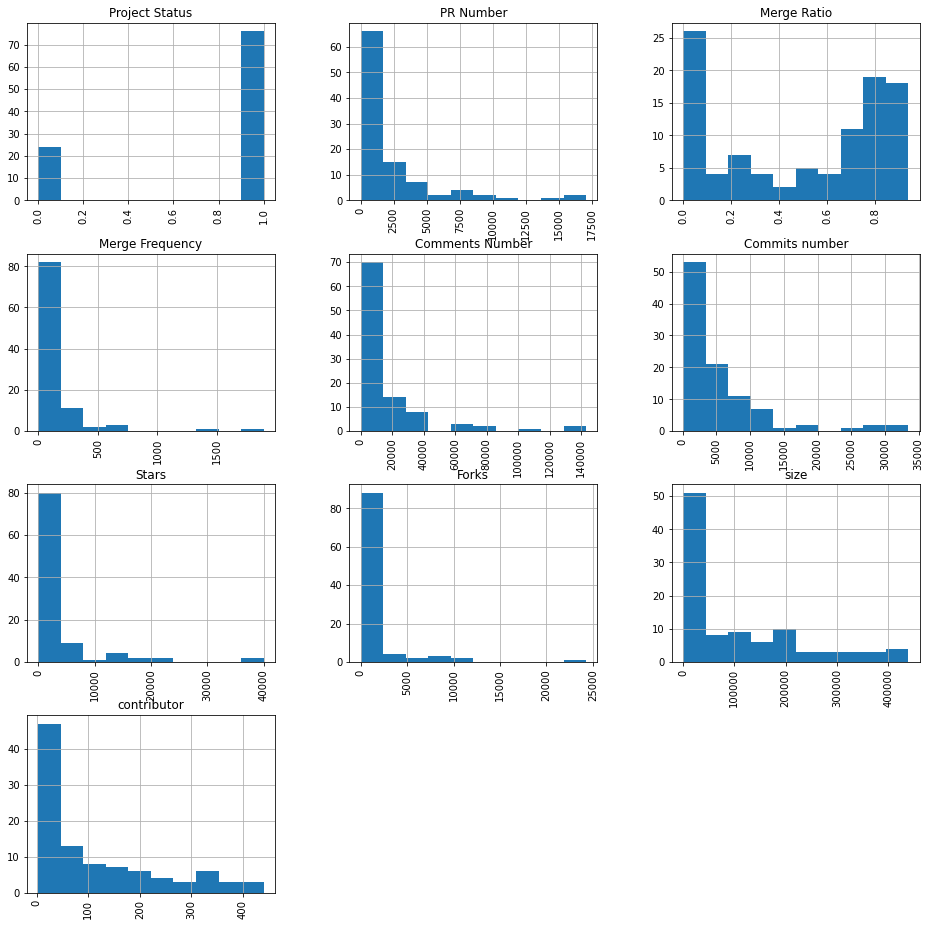

In [10]:
data_model1.hist(figsize=(16,16),xrot = 90)
plt.show()

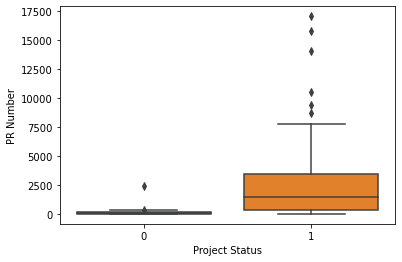

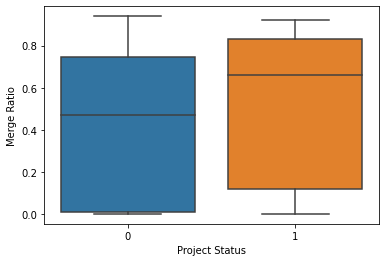

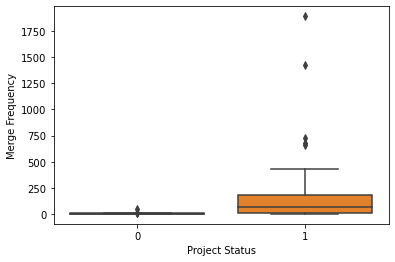

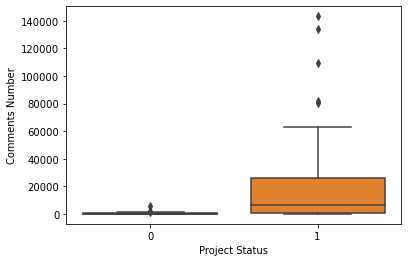

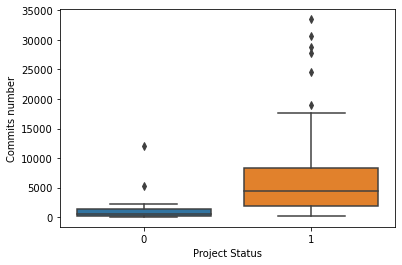

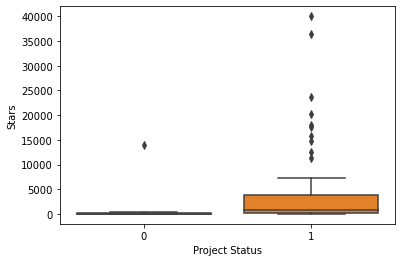

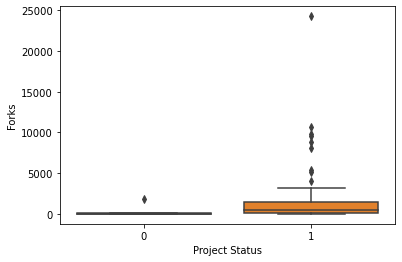

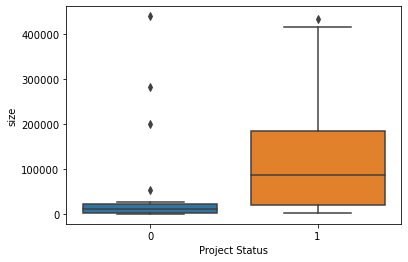

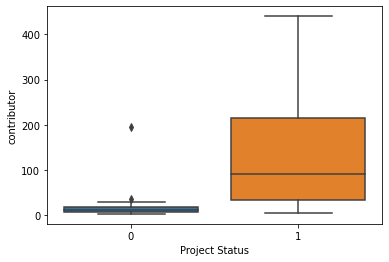

In [11]:
num_cols = ['PR Number','Merge Ratio','Merge Frequency','Comments Number','Commits number','Stars','Forks','size','contributor']

for col in num_cols:
    sns.boxplot(x = data_model1['Project Status'].astype('category'), y=col, data=data_model1)
    plt.show()

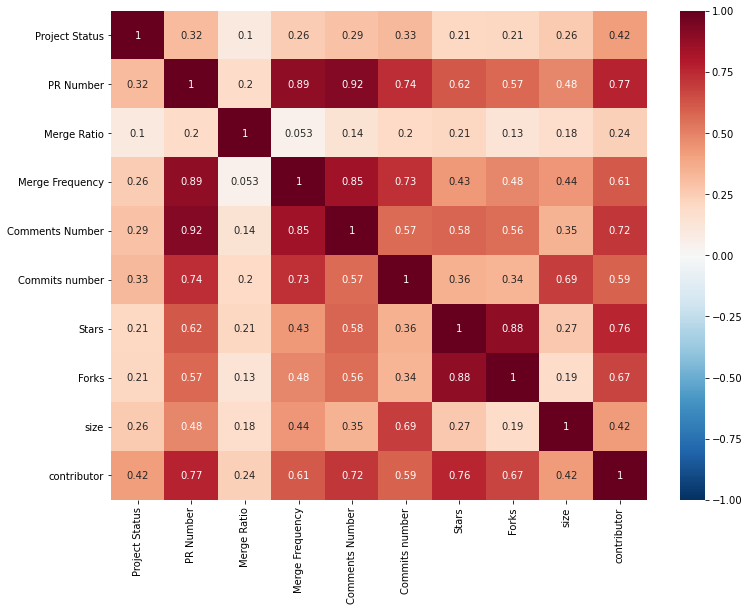

In [12]:
corrmat = data_model1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

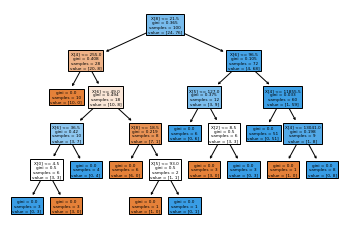

In [61]:
from sklearn import tree
y = data_model1['Project Status']
X = data_model1.iloc[:,1:]

clf = tree.DecisionTreeClassifier(random_state=80)
clf = clf.fit(X, y)
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.png')


In [62]:
clf.feature_importances_

array([0.08223684, 0.        , 0.08223684, 0.        , 0.12352931,
       0.0685307 , 0.14330531, 0.        , 0.50016099])

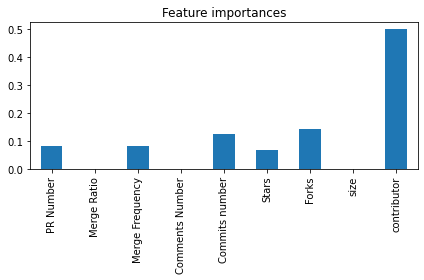

In [63]:
forest_importances = pd.Series(clf.feature_importances_, index=data_model1.columns[1:])

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [42]:
data_model1['PR Number'] = data_model1['PR Number']**0.5
data_model1['Merge Frequency'] = data_model1['Merge Frequency']**0.5
data_model1['Comments Number'] = data_model1['Comments Number']**0.5
data_model1['Commits number'] = data_model1['Commits number']**0.5
data_model1['Stars'] = data_model1['Stars']**0.5
data_model1['Forks'] = data_model1['Forks']**0.5

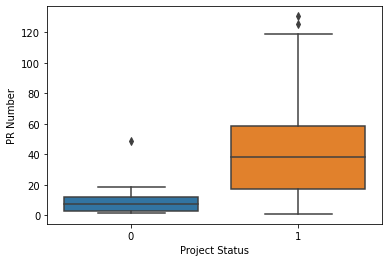

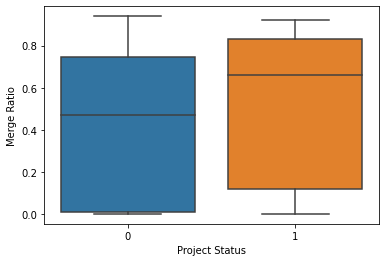

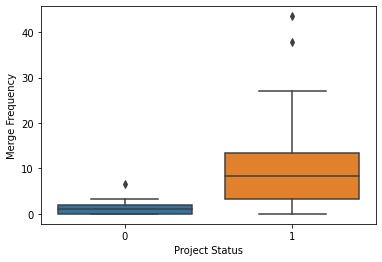

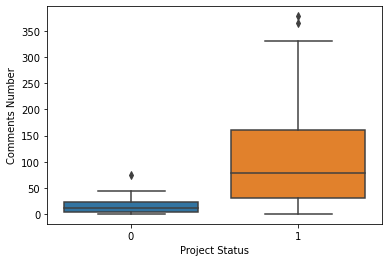

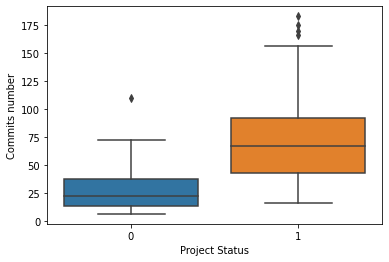

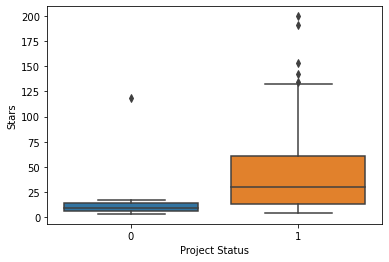

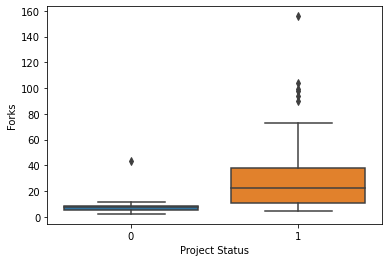

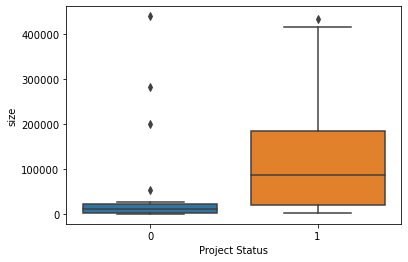

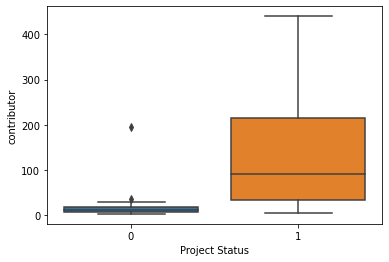

In [43]:
num_cols = ['PR Number','Merge Ratio','Merge Frequency','Comments Number','Commits number','Stars','Forks','size','contributor']

for col in num_cols:
    sns.boxplot(x = data_model1['Project Status'].astype('category'), y=col, data=data_model1)
    plt.show()

## logistic regression

### SquareRoot

In [19]:
y = data_model1['Project Status']
X = data_model1.iloc[:,1:]
X['intercept'] = 1.0
X['PR Number'] = X['PR Number']**0.5
X['Merge Frequency'] = X['Merge Frequency']**0.5
X['Comments Number'] = X['Comments Number']**0.5
X['Commits number'] = X['Commits number']**0.5
X['Stars'] = X['Stars']**0.5
X['Forks'] = X['Forks']**0.5
model = sm.Logit(y, X)
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.229287
         Iterations 11


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Project Status   No. Observations:                  100
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            9
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.5839
Time:                        12:03:26   Log-Likelihood:                -22.929
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 1.923e-10
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PR Number          -0.2620      0.151     -1.733      0.083      -0.558       0.034
Merge Ratio        -0.7692      1.296     -0.594      0.553      -3.309       1.771
Merge Frequency     1.3084      0.620      2.109      0.035       0.092       2.524
Comments Number     0.0172      0.047      0.366      0.714      -0.075       0.109
Commits number      0.0311      0.028      1.122      0.262      -0.023       0.085
Stars              -0.3498      0.149     -2.346      0.019      -0.642      -0.058
Forks               0.6380      0.311      2.055      0.040       0.029       1.247
size             -3.64e-07   3.99e-06     -0.091      0.927   -8.19e-06    7.46e-06
contributor         0.0861      0.051      1.679      0.093      -0.014       0.187
intercept          -3.6122      1.421     -2.542      0.011      -6.397      -0.827
===================================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## model 2

In [21]:
data_model2.head()

,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,Project Status
0,299.093530,139.467650,6.743547,3.242709,7.135434,1
1,8932.333333,133.333333,81.000000,9.000000,0.333333,1
2,237.365385,64.375000,7.227564,3.862179,5.275641,1
3,196.054636,25.753311,5.375828,3.415563,3.942053,1
4,7430.000000,2207.000000,221.000000,73.000000,0.000000,1


In [22]:
data_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   average_additions         100 non-null    float64
 1   average_deletions         100 non-null    float64
 2   average_pr_changed_files  100 non-null    float64
 3   average_pr_commits_count  100 non-null    float64
 4   average_total_comments    100 non-null    float64
 5   Project Status            100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [23]:
data_model2.describe()

,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,Project Status
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4036.437659,926.085036,52.942584,9.050037,4.063847,0.760000
std,13203.427955,2062.388403,170.022353,16.634972,3.560006,0.429235
min,6.000000,0.000000,1.333333,1.000000,0.000000,0.000000
25%,330.175325,95.153585,9.435484,2.164147,1.329053,1.000000
50%,639.135200,232.657617,18.103036,3.863421,3.367563,1.000000
75%,1404.575442,749.539577,24.222334,6.787569,5.649123,1.000000
max,84843.230770,14679.153850,1579.750000,116.333333,16.750000,1.000000


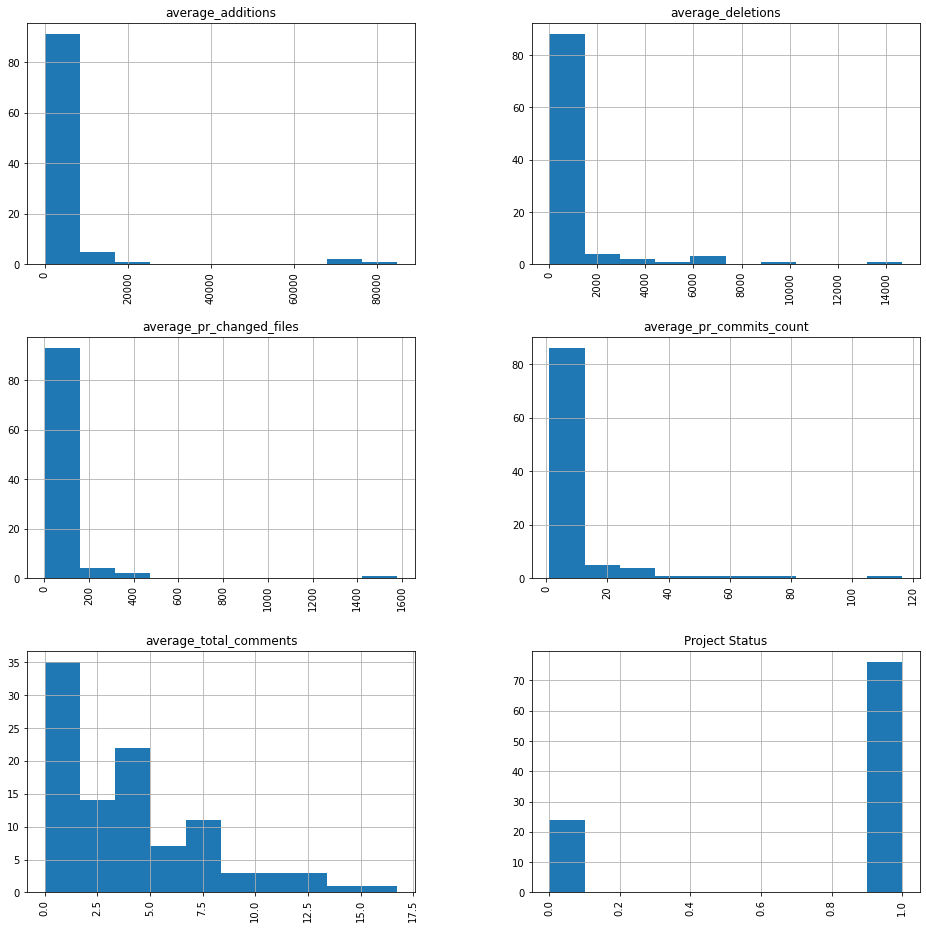

In [24]:
data_model2.hist(figsize=(16,16),xrot = 90)
plt.show()

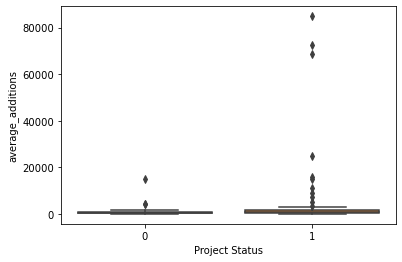

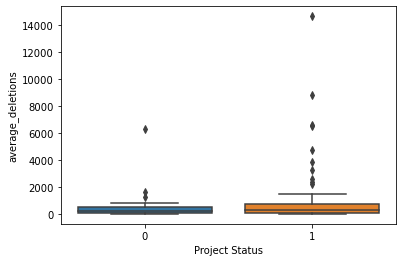

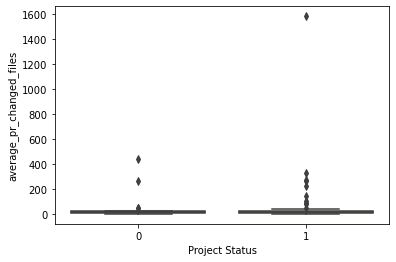

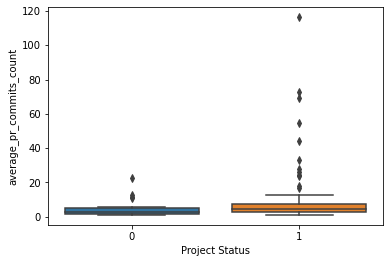

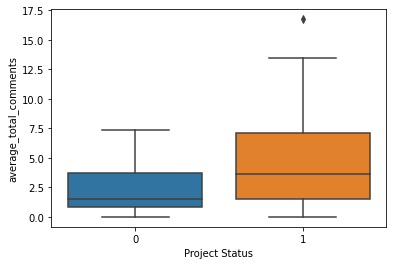

In [25]:
num_cols = ['average_additions','average_deletions','average_pr_changed_files','average_pr_commits_count','average_total_comments']

for col in num_cols:
    sns.boxplot(x = data_model2['Project Status'].astype('category'), y=col, data=data_model2)
    plt.show()

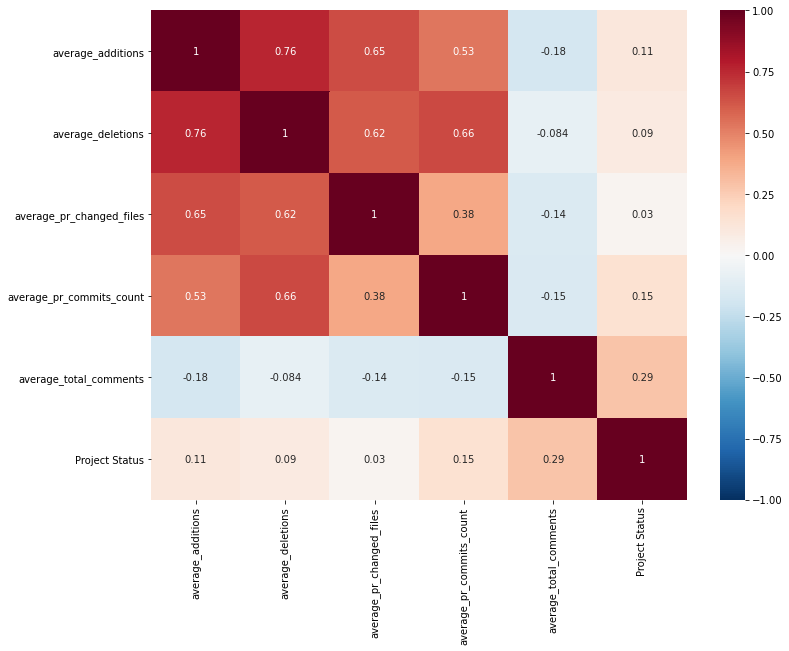

In [26]:
corrmat = data_model2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Logistic Regression

In [27]:
y = data_model2['Project Status']
X = data_model2.iloc[:,:5]
 
X['average_additions'] = X['average_additions'] ** 0.5
X['average_deletions'] = X['average_deletions'] ** 0.5
X['average_pr_changed_files'] = X['average_pr_changed_files'] ** 0.5
X['average_pr_commits_count'] = X['average_pr_commits_count'] ** 0.5
X['intercept'] = 1.0
model = sm.Logit(y, X)
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.433040
         Iterations 7


In [28]:
X

,average_additions,average_deletions,average_pr_changed_files,average_pr_commits_count,average_total_comments,intercept
0,17.294321,11.809642,2.596834,1.800752,7.135434,1.0
1,94.511022,11.547005,9.000000,3.000000,0.333333,1.0
2,15.406667,8.023403,2.688413,1.965243,5.275641,1.0
3,14.001951,5.074772,2.318583,1.848124,3.942053,1.0
4,86.197448,46.978719,14.866069,8.544004,0.000000,1.0
...,...,...,...,...,...,...
95,24.899799,12.825755,6.745369,2.345208,1.000000,1.0
96,17.663522,1.414214,3.000000,4.743416,0.000000,1.0
97,13.083909,10.653195,3.436760,1.205334,1.584906,1.0
98,63.698182,79.590357,21.004960,3.529636,5.958333,1.0


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Project Status   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.2142
Time:                        12:03:39   Log-Likelihood:                -43.304
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 0.0002582
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
average_additions            0.0356      0.018      1.994      0.046       0.001       0.071
average_deletions           -0.0408      0.028     -1.462      0.144      -0.095       0.014
average_pr_changed_files    -0.1803      0.127     -1.425      0.154      -0.428       0.068
average_pr_commits_count     0.6426      0.309      2.083      0.037       0.038       1.247
average_total_comments       0.4381      0.145      3.018      0.003       0.154       0.723
intercept                   -1.1085      0.689     -1.608      0.108      -2.459       0.242
============================================================================================
"""

In [32]:
y = data_model2['Project Status']
X = data_model2.iloc[:,:5]
X['code churn'] = X['average_additions']+X['average_deletions']
X['average_additions'] = X['average_additions'] ** 0.5
X['average_deletions'] = X['average_deletions'] ** 0.5
X['average_pr_changed_files'] = X['average_pr_changed_files'] ** 0.5
X['average_pr_commits_count'] = X['average_pr_commits_count'] ** 0.5


X = X.drop(columns = 'average_additions')
X = X.drop(columns = 'average_deletions')

Optimization terminated successfully.
         Current function value: 0.419405
         Iterations 9


In [40]:
model = sm.Logit(y, X)
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.431306
         Iterations 9


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Project Status   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.2173
Time:                        12:09:17   Log-Likelihood:                -43.131
converged:                       True   LL-Null:                       -55.108
Covariance Type:            nonrobust   LLR p-value:                 2.553e-05
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
average_pr_changed_files    -0.3956      0.160     -2.479      0.013      -0.708      -0.083
average_pr_commits_count     0.5683      0.241      2.357      0.018       0.096       1.041
average_total_comments       0.3666      0.112      3.263      0.001       0.146       0.587
code churn                   0.0003      0.000      1.705      0.088   -3.96e-05       0.001
============================================================================================
"""